**FADHLUROHMAN AL FARABI**

**TI-3E**

**Absen 12**

*Praktikum 1*

Klasifikasi SVM dengan data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus data dummy ini memperlihatkan dua kelas yang telah terpisah

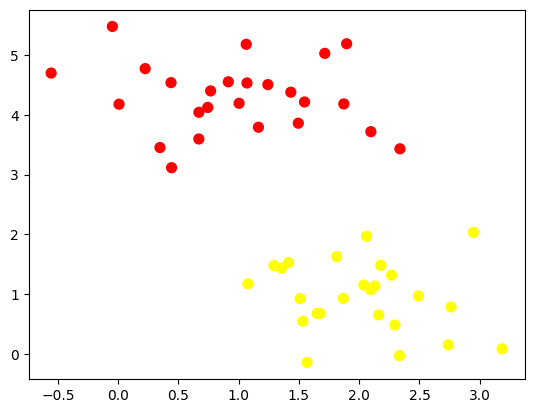

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

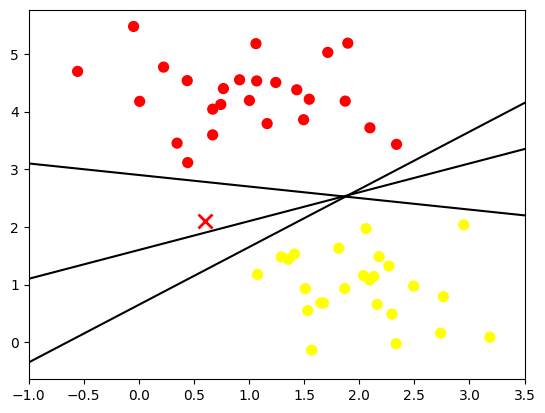

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

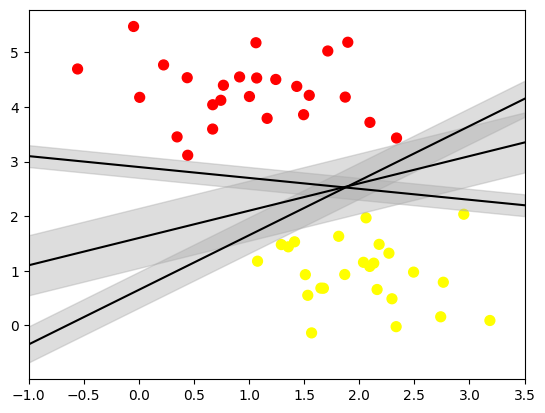

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

Penerapan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

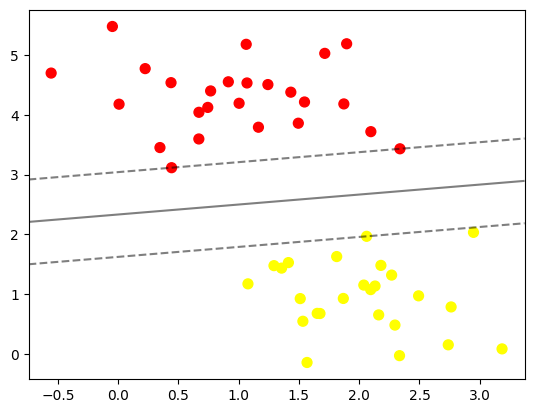

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

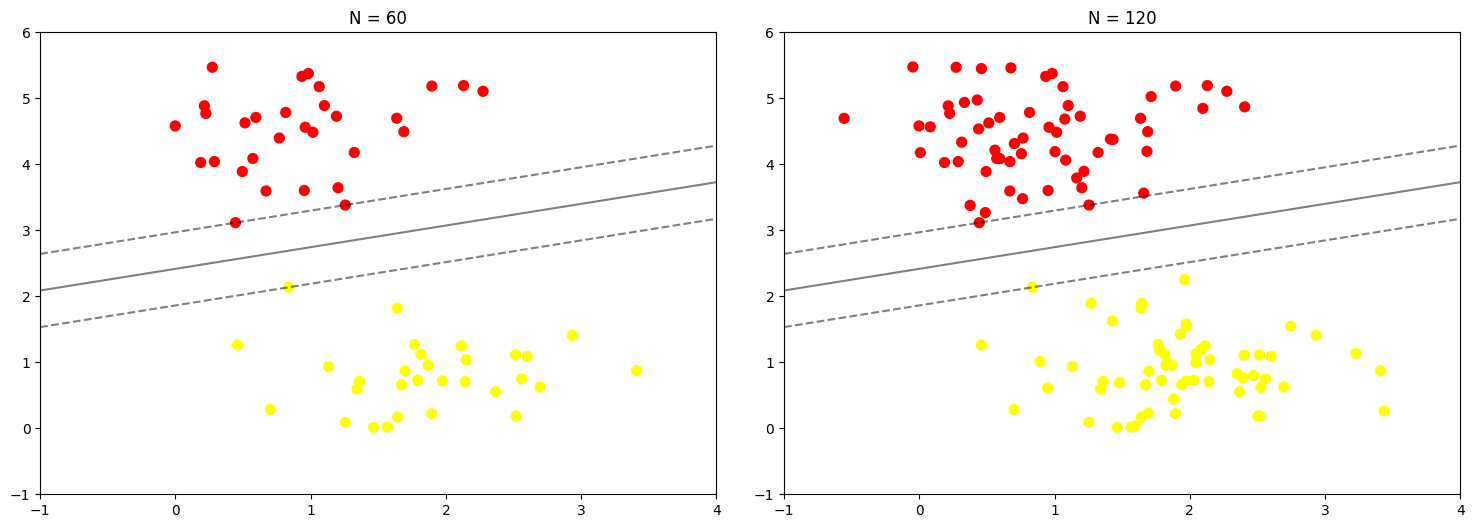

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

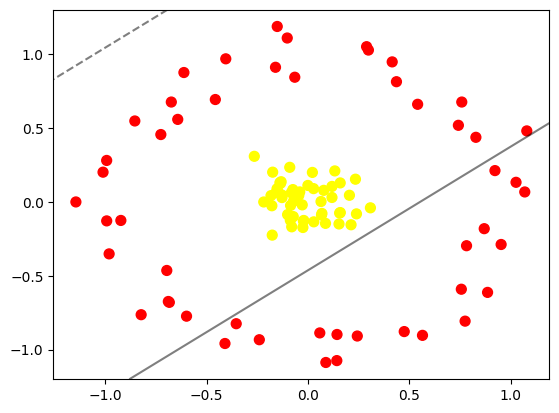

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.85812399e-02, -8.87552947e-01],
       [ 4.75151660e-01, -8.78451154e-01],
       [ 1.06980257e+00,  6.79339708e-02],
       [ 1.43543943e-01, -8.98133914e-01],
       [ 1.18709504e-01,  3.06106486e-02],
       [-4.52037427e-02,  4.39592163e-02],
       [ 4.15763568e-01,  9.49529916e-01],
       [-6.11812921e-01,  8.77444208e-01],
       [-8.95907388e-02,  2.34976389e-01],
       [-1.76075903e-01, -2.24724343e-01],
       [ 1.07985780e+00,  4.81793802e-01],
       [-4.03034433e-02,  6.82637781e-02],
       [ 7.80400637e-02,  7.88591416e-02],
       [ 2.34502442e-01,  1.54379449e-01],
       [-8.53941042e-01,  5.49057659e-01],
       [ 4.36804213e-01,  8.15231084e-01],
       [-2.05161248e-02, -1.25428789e-01],
       [-2.17852714e-01, -3.22183767e-06],
       [-7.99272828e-02, -1.68321799e-01],
       [ 2.78153667e-02,  9.05172506e-02],
       [-1.14467687e+00,  2.20116158e-04],
       [ 1.59246047e-01,  1.29217850e-01],
       [ 2.04832562e-01,  4.54601589e-02],
       [-9.92843577e-01,  2.81500491e-01],
       [ 6.70184253e-02, -8.85828722e-02],
       [-1.01076970e+00,  2.01982180e-01],
       [-9.22853694e-01, -1.25177702e-01],
       [ 2.12828400e-01, -1.54530218e-01],
       [ 9.22767679e-01,  2.12681311e-01],
       [-6.96253270e-01, -4.64270610e-01],
       [ 2.43576040e-01, -9.08572300e-01],
       [-6.73959739e-01,  6.77416692e-01],
       [ 8.67685750e-02, -1.45013025e-01],
       [ 1.02669578e+00,  1.33333156e-01],
       [-8.66883263e-02, -1.24303634e-01],
       [ 1.42601865e-01, -1.07514700e+00],
       [-7.41667510e-02,  8.39155239e-02],
       [-9.92659101e-01, -1.28192789e-01],
       [ 7.42315462e-01,  5.19653060e-01],
       [-1.27882643e-01,  4.67515514e-02],
       [-1.02017387e-01,  1.11142176e+00],
       [ 2.89195880e-02, -1.34617582e-01],
       [-7.12961333e-02,  4.80682989e-03],
       [-1.27802179e-01,  2.99102030e-02],
       [ 7.82551229e-01, -2.96459221e-01],
       [-4.05223101e-01,  9.70323187e-01],
       [-1.77884671e-01, -2.57019201e-02],
       [ 7.59051200e-01,  6.77396204e-01],
       [-6.42208897e-01,  5.59740245e-01],
       [ 6.46638646e-02,  3.22242385e-03],
       [-6.83717298e-01, -6.80365421e-01],
       [-5.98826835e-01, -7.74140653e-01],
       [-8.22721865e-01, -7.64086661e-01],
       [ 2.89500064e-01,  1.05255010e+00],
       [-2.47721903e-02, -1.72954579e-01],
       [-7.25585588e-01,  4.57071206e-01],
       [-1.89733559e-04,  1.11993007e-01],
       [-1.73942883e-01,  2.02037729e-01],
       [-1.59937400e-01,  9.12973705e-01],
       [ 8.86326353e-01, -6.12831643e-01],
       [-4.09199709e-01, -9.59253929e-01],
       [-3.53733103e-01, -8.25166545e-01],
       [ 5.65227692e-01, -9.04035155e-01],
       [ 1.32731789e-01,  2.10554110e-01],
       [-8.21060654e-02,  6.24659573e-02],
       [ 1.53377724e-01, -1.49042173e-01],
       [ 5.41307922e-01,  6.62053409e-01],
       [-1.51366466e-01,  1.18953679e+00],
       [ 9.53180554e-01, -2.88151434e-01],
       [ 2.20154051e-02,  2.00385875e-01],
       [-1.38186686e-01,  1.30901577e-01],
       [-7.23958065e-02, -9.91507703e-02],
       [-1.32208276e-01,  1.37270117e-01],
       [-2.21877607e-02, -1.28730800e-01],
       [-1.52193133e-01,  8.96866196e-02],
       [-1.34985808e-01,  1.26335432e-01],
       [-9.80680043e-01, -3.51797819e-01],
       [ 7.75468770e-01, -8.07791488e-01],
       [-1.56125774e-01,  6.59189599e-02],
       [-6.48162923e-02,  8.45543632e-01],
       [ 1.18759274e-01,  1.05436926e-01],
       [ 6.91709595e-02, -7.77479878e-02],
       [-1.00231416e-01, -8.56978340e-02],
       [ 3.08341896e-01, -3.96024968e-02],
       [-1.82148248e-01,  4.30692936e-02],
       [ 1.56520533e-01, -7.49310613e-02],
       [ 8.69855603e-01, -1.80983027e-01],
       [-2.80379746e-02, -1.97203489e-02],
       [-6.88617686e-01, -6.74510897e-01],
       [ 2.39512785e-01, -8.06207148e-02],
       [ 7.56823409e-01, -5.91397118e-01],
       [ 1.59681929e-01, -7.18258592e-02

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

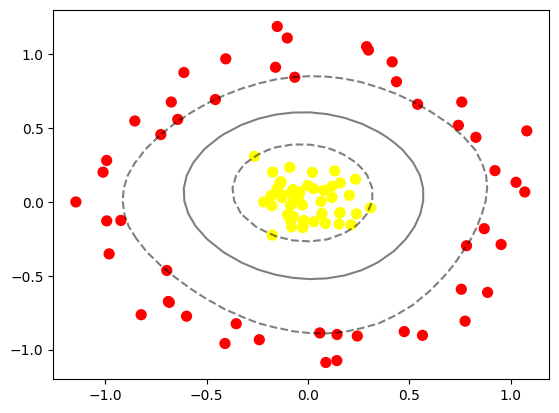

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Data Overlap

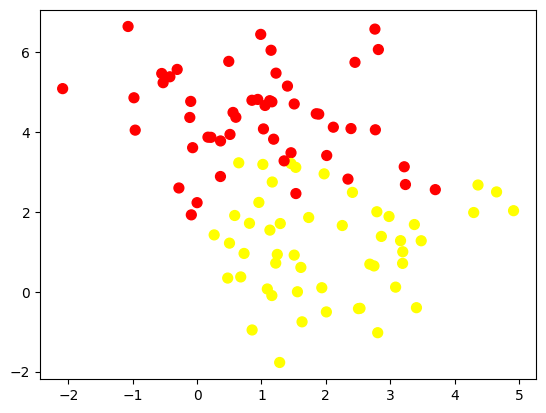

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

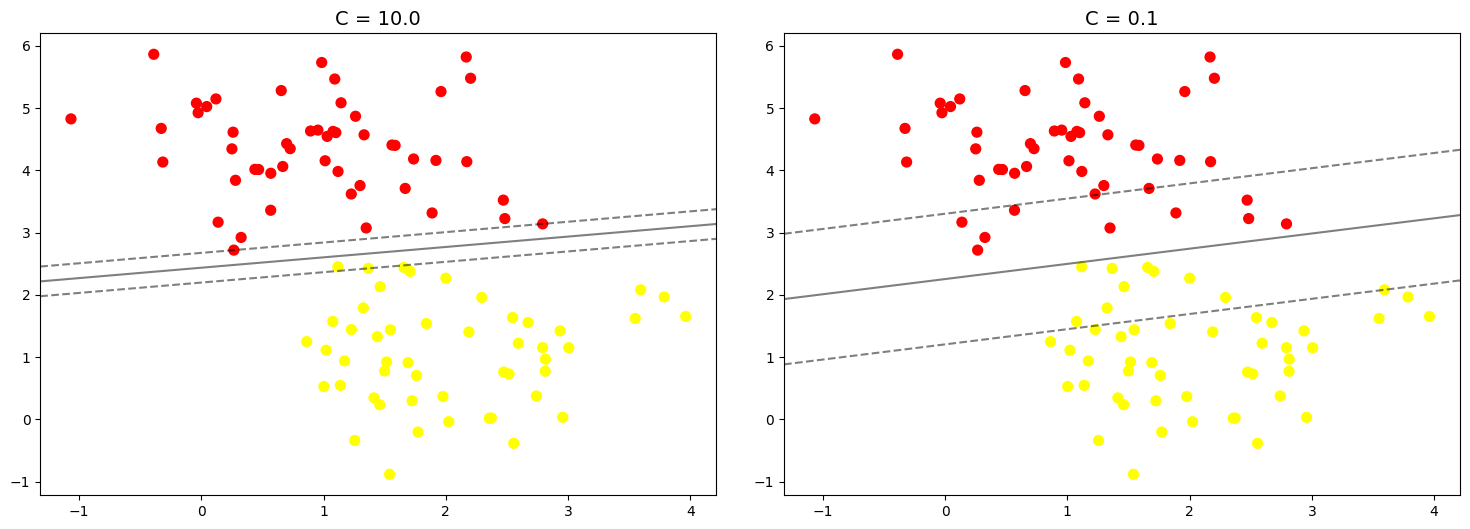

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

*Praktikum 2*

Klasifikasi SVM pada Data Citra

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

Link : https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


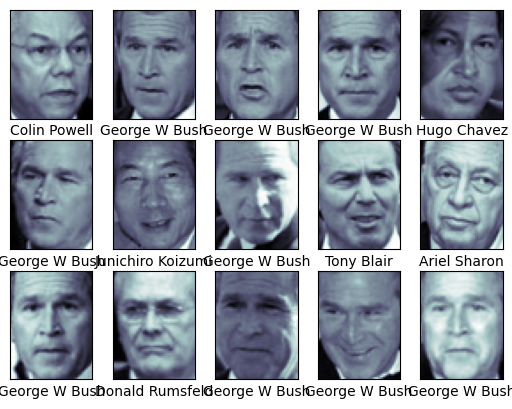

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 42s, sys: 26.3 s, total: 2min 8s
Wall time: 1min 24s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


prediksi label untuk data testing

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

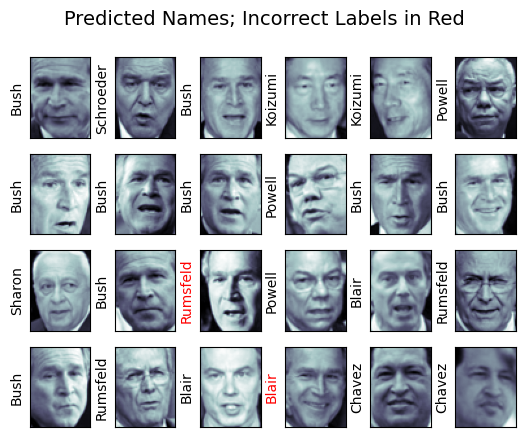

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

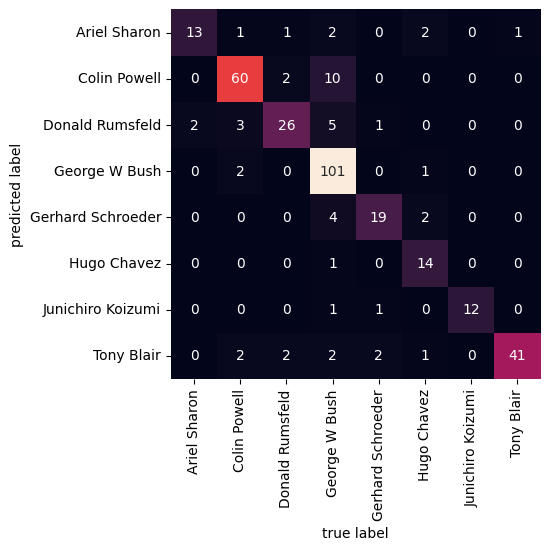

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

*Praktikum 3*

Klasifikasi Naive Bayes dengan Data Dummy

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

Mendefinisikan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[173  23]
 [ 85 125]
 [  5 213]
 [ 98 102]
 [111  89]
 [173   3]
 [119  75]
 [ 35 186]
 [ 65 125]
 [ 86 126]
 [ 60 134]
 [138  82]
 [180  48]
 [ 80 107]
 [135  82]
 [137  56]
 [110 221]
 [209  86]
 [237 240]
 [  6  28]
 [ 78  53]
 [254 149]
 [264  83]
 [177  83]
 [ 67  90]
 [124 106]
 [135  63]
 [ 17 118]
 [ 35 109]
 [168  37]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

* n_samples: jumlah sampel yang diinginkan

* n_features: jumlah fitur yang digunakan

* n_classes: jumlah kelas

* n_informative: jumlah fitur yang memiliki korelasi dengan kelas

* n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas

* n_repeated: jumlah fitur yang diulang

(Membuat Data Frame)

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,173,23,0
1,85,125,0
2,5,213,0
3,98,102,0
4,111,89,0


Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,173,23,Kelas B
1,85,125,Kelas B
2,5,213,Kelas B
3,98,102,Kelas B
4,111,89,Kelas B


Visualisasi Data

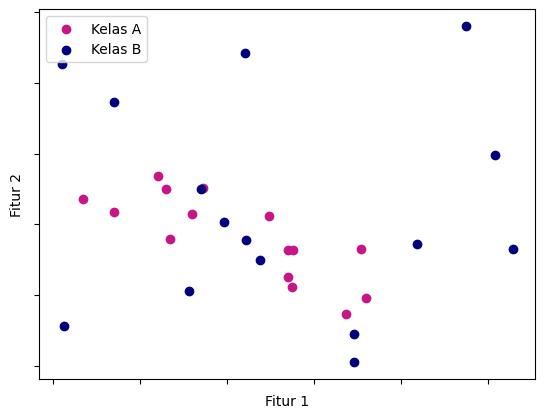

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.2222222222222222


Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.5555555555555556


*Praktikum 4*

Klasifikasi Naive Bayes pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

Load Data

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

Pra Pengolahan Data

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

Drop Kolom

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama Kolom V1 dan V2

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Inspeksi Data

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Encode Label

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Memisahkan fitur dengan label

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

Ekstraksi Fitur

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


Training dan Evaluasi Model

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


*Praktikum 5*

Klasifikai Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

Langkah 0 - Import Library

In [3]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Image directories
train_dir = "/content/drive/MyDrive/KULIAH/SEMESTER 5/MACHINE LEARNING/JOBSHEET 4/images/training/"
test_dir = "/content/drive/MyDrive/KULIAH/SEMESTER 5/MACHINE LEARNING/JOBSHEET 4/images/test/"

Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar

In [6]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [7]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [8]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[11, 10,  6],
         [ 4,  3,  0],
         [ 3,  0,  0],
         ...,
         [ 4,  0,  7],
         [23, 17, 27],
         [ 1,  0,  7]],
 
        [[18, 15, 10],
         [19, 16, 11],
         [ 4,  0,  0],
         ...,
         [17, 10, 18],
         [ 5,  0,  7],
         [ 8,  5, 12]],
 
        [[22, 15,  7],
         [ 9,  2,  0],
         [28, 21, 13],
         ...,
         [56, 50, 54],
         [ 3,  0,  2],
         [12, 10, 13]],
 
        ...,
 
        [[84, 32, 45],
         [94, 42, 54],
         [88, 39, 43],
         ...,
         [65, 41, 41],
         [63, 40, 46],
         [70, 47, 55]],
 
        [[97, 45, 58],
         [65, 13, 25],
         [37,  0,  0],
         ...,
         [31,  6,  9],
         [76, 53, 61],
         [36, 12, 25]],
 
        [[60,  6, 20],
         [99, 47, 59],
         [98, 49, 53],
         ...,
         [42, 17, 23],
         [42, 18, 31],
         [52, 28, 42]]], dtype=uint8),
 'night')

Cek ukuran gambar secara acak

In [9]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 96
(591, 800, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [10]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (469, 640, 3)
Label	: night


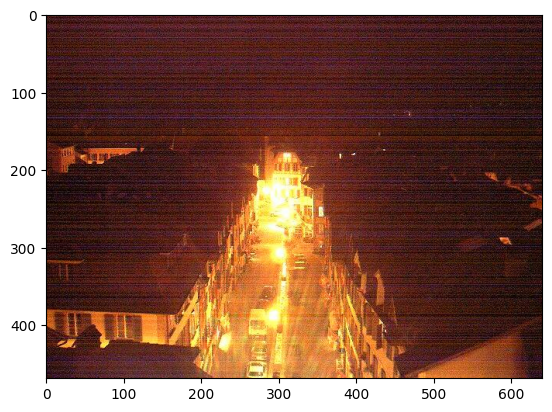

In [14]:
random_img_viz(train_img)

Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [15]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [16]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [17]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training

In [18]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak

In [19]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 70
(600, 1100, 3)


WARNING! Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 1


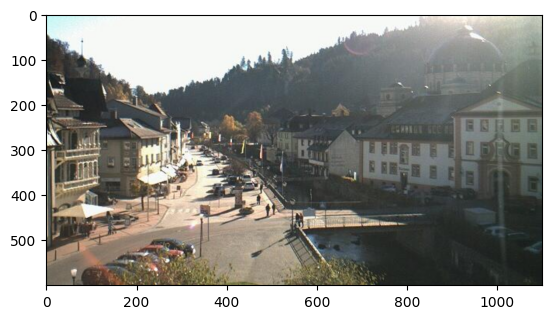

In [20]:
random_img_viz(train_std_img_list)

Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [21]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 119
Avg Brighness: 27.9004


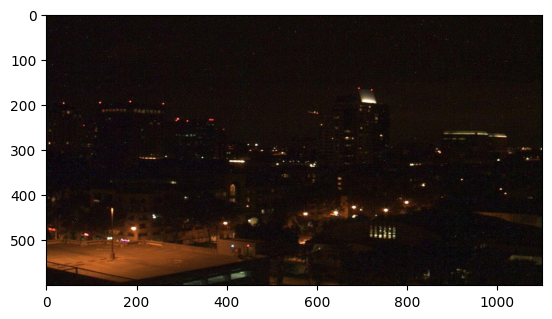

In [22]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [23]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Image 22
Actual label: 0
Predicted label: 0


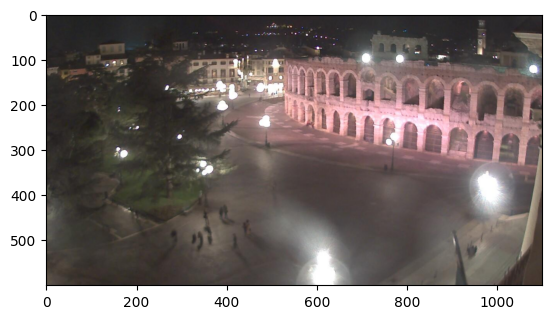

In [24]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Langkah 6 - Evaluasi (Manual)

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [25]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [26]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [27]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

Langkah 4 alternatif - Membuat Feature Vectors

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [28]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

In [29]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,96.230239,0.0
1,14.534517,0.0
2,95.119070,0.0
3,87.313103,0.0
4,102.748306,0.0


Lakukan langkah yang serupa pada data testing

In [30]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,82.367332,0.0
1,108.228476,0.0
2,37.459415,0.0
3,176.830915,0.0
4,116.502630,0.0


Langkah 5 alternatif

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [31]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

Langkah 6 alternatif

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [32]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


**Tugas 1**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv

In [33]:
from google.colab import files
uploaded = files.upload()


Saving voice.csv to voice.csv


In [34]:
import pandas as pd

# Load the dataset
data = pd.read_csv('voice.csv')

# Display the first few rows of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

(   meanfreq        sd    median       Q25       Q75       IQR       skew  \
 0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
 1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
 2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
 3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
 4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
 
           kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
 0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
 1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
 2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
 3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
 4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
 
      maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
 0  0.275862  0.00

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Encode the label column
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # 0: female, 1: male

# Split the data into features and target
X = data.drop(columns='label')
y = data['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an SVM classifier
svm_model = SVC(kernel='linear')

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

# Calculate the mean accuracy
mean_accuracy = cv_scores.mean()

mean_accuracy, cv_scores


(0.9671784751396633,
 array([0.92902208, 0.97791798, 0.97318612, 0.98262243, 0.97314376]))

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

- Menggunakan data spam.csv

- Fitur CountVectorizer dengan mengaktifkan stop_words

- Evaluasi hasilnya

3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

- Menggunakan data spam.csv

- Fitur TF-IDF dengan mengaktifkan stop_words

- Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

- Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [41]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [42]:
import pandas as pd

data = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows of the dataset to understand its structure
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Clean the data: keep only the relevant columns 'v1' (label) and 'v2' (text)
data_cleaned = data[['v1', 'v2']].dropna()
data_cleaned.columns = ['label', 'text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned['text'], data_cleaned['label'], test_size=0.3, random_state=42)

# ===========================
# Model 1: CountVectorizer
# ===========================

# Create a CountVectorizer instance with stop words removal
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the text data into feature vectors
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier using CountVectorizer features
model_nb_count = MultinomialNB()
model_nb_count.fit(X_train_counts, y_train)

# Make predictions and evaluate the model
y_pred_count = model_nb_count.predict(X_test_counts)
report_count = classification_report(y_test, y_pred_count)

print("=== Classification Report using CountVectorizer ===")
print(report_count)

# ===========================
# Model 2: TF-IDF Vectorizer
# ===========================

# Create a TfidfVectorizer instance with stop words removal
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text data into TF-IDF feature vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier using TF-IDF features
model_nb_tfidf = MultinomialNB()
model_nb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred_tfidf = model_nb_tfidf.predict(X_test_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("\n=== Classification Report using TF-IDF Vectorizer ===")
print(report_tfidf)

# ===========================
# Comparison and Conclusion
# ===========================

print("\nComparison:")
print("CountVectorizer Accuracy:", report_count.split()[-2])
print("TF-IDF Accuracy:", report_tfidf.split()[-2])


=== Classification Report using CountVectorizer ===
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1453
        spam       0.95      0.92      0.94       219

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672


=== Classification Report using TF-IDF Vectorizer ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672


Comparison:
CountVectorizer Accuracy: 0.98
TF-IDF Accuracy: 0.97


**Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [40]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from skimage import exposure

# Image directories
train_dir = "/content/drive/MyDrive/KULIAH/SEMESTER 5/MACHINE LEARNING/JOBSHEET 4/images/training/"
test_dir = "/content/drive/MyDrive/KULIAH/SEMESTER 5/MACHINE LEARNING/JOBSHEET 4/images/test/"

# Function to load dataset
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]  # Extract the folder name as the label
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if img is not None:
                img_list.append((img, label))

    return img_list

# Redefining the necessary preprocessing functions to standardize and label the images
def standarized_input(image):
    # Resize to width: 1100, height: 600
    std_img = cv2.resize(image, (1100, 600))
    return std_img

def label_encoder(label):
    # Encode the label: 'day' as 1, 'night' as 0
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        # Standardize the image and encode the label
        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

# Reload and preprocess training and test datasets
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

# Function to compute histogram of an image in HSV color space
def compute_histogram(image, bins=(8, 8, 8)):
    # Convert to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Compute histogram for each channel (Hue, Saturation, Value)
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()  # Normalize and flatten the histogram
    return hist

# Prepare the dataset by computing histograms
def prepare_data_with_histograms(img_list):
    features = []
    labels = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Compute the histogram
        hist = compute_histogram(image)
        features.append(hist)

        # Append label
        labels.append(label)

    return np.array(features), np.array(labels)

# Preprocess training data
train_features, train_labels = prepare_data_with_histograms(train_std_img_list)

# Train the SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_features, train_labels)

# Preprocess test data and extract features
test_features, test_labels = prepare_data_with_histograms(test_std_img_list)

# Predict on test data
test_predictions = svm_model.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy on test data: {accuracy:.4f}")


Accuracy on test data: 0.9625
